In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from collections import namedtuple
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset

In [2]:
fileList = open('/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/fileList.txt', 'r')  # fileList is the name of the txt that contains the names of the .nc files
for i in fileList:
    print(i)

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T003346_20200102T021516_11501_01_010302_20200103T171851.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T021516_20200102T035646_11502_01_010302_20200103T185327.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T035646_20200102T053816_11503_01_010302_20200103T204214.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T053816_20200102T071946_11504_01_010302_20200103T224929.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T071946_20200102T090116_11505_01_010302_20200104T001641.nc



1593.1345 1935.9631
Figure saved.
1529.7837 1992.4156
Figure saved.
1555.6134 1988.7699
Figure saved.
1480.2012 1995.3708
Figure saved.
Finished!


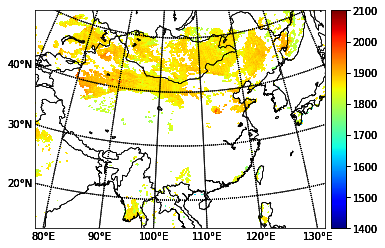

In [63]:
fileList = open('/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/fileList.txt', 'r')   # fileList is the name of the txt that contains the names of the .nc files
# loops through all files listed in the text file
for FILE_NAME in fileList:  # FILE_NAME will be the name of e
    FILE_NAME = FILE_NAME.strip()  # strip() removes remove all the leading and trailing spaces from a string
    file = Dataset(FILE_NAME, 'r')  # Dataset is a netCDF4 method used to open .nc files
    ds = file
    lat = ds.groups['PRODUCT'].variables['latitude'][0][:][:]  # Gets latitude array
    lon = ds.groups['PRODUCT'].variables['longitude'][0][:][:]  # Gets longitude array
    data = ds.groups['PRODUCT'].variables['methane_mixing_ratio'][0]  # data will be the array of pollutants concentrations
    print(np.min(data), np.max(data))
    
    m = Basemap(width=6000000, height=4500000, resolution='l', projection='stere', lat_ts=40, lat_0=35,
                lon_0=105)
    m.drawcoastlines(linewidth=0.5)
    m.drawstates()
    m.drawcountries()
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180, 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    vmin1 = 1400
    vmax1 = 2100
    # draw CH4 on the map
    m.pcolor(lon, lat, data, latlon=True, vmin=vmin1, vmax=vmax1, cmap='jet')
    cb = m.colorbar()

    fig = plt.gcf()

    # saves as a png 
    pngfile = '{0}.png'.format(FILE_NAME[:-3])
    fig.savefig(pngfile, dpi=750)
    
    # close the file
    file.close()
    print('Figure saved.')
print('Finished!')
# Show the plot window.
plt.show()


## Some plot excersie using Basemap

{70.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e3b90>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e5dd0>],
  [Text(162000.0, -60000.0, '80°E')]),
 90.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e3410>],
  [Text(1326000.0, -60000.0, '90°E')]),
 100.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e3390>],
  [Text(2448000.0, -60000.0, '100°E')]),
 110.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e5fd0>],
  [Text(3558000.0, -60000.0, '110°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x7fe73c8e5f50>],
  [Text(4680000.0, -60000.0, '120°E')]),
 130.0: ([<matplotlib.lines.Line2D at 0x7fe73bbbc910>],
  [Text(5844000.0, -60000.0, '130°E')]),
 140.0: ([<matplotlib.lines.Line2D at 0x7fe73c87a350>], [])}

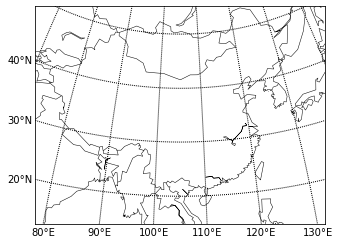

In [14]:
m = Basemap(width=6000000, height=4500000, resolution='c', projection='stere', lat_ts=40, lat_0=35,
            lon_0=105)
m.drawcoastlines(linewidth=0.5)
m.drawstates()
m.drawcountries()
m.drawparallels(np.arange(-80., 81., 10.), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(-180, 181., 10.), labels=[0, 0, 0, 1], fontsize=10)

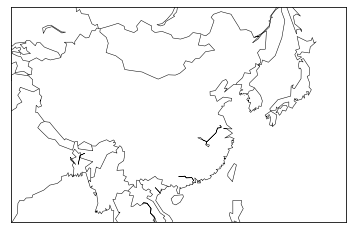

In [15]:
m = Basemap(width=7000000, height=4500000, resolution='c', projection='stere', lat_ts=40, lat_0=35,
            lon_0=110)
m.drawcoastlines(linewidth=0.5)
m.drawstates()
m.drawcountries()
# m.drawparallels(np.arange(-80., 81., 10.), labels=[1, 0, 0, 0], fontsize=10)
# m.drawmeridians(np.arange(-180, 181., 10.), labels=[0, 0, 0, 1], fontsize=10)